In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
%matplotlib inline
np.set_printoptions(precision=4)

### Carga dos dados

In [58]:
df_segmentos = pd.read_json("./datasets/extracao-segmentos.json")

### Estrutura da fonte de dados

In [59]:
df_segmentos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613734 entries, 0 to 613733
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   pk_ato           613734 non-null  int64 
 1   data_publicacao  613734 non-null  object
 2   tipo_ato         613734 non-null  object
 3   pk_segmento      613734 non-null  int64 
 4   tipo_segmento    613734 non-null  object
 5   texto_segmento   613734 non-null  object
dtypes: int64(2), object(4)
memory usage: 28.1+ MB


In [60]:
# Conversão do atributo data_publicacao para formato de data
df_segmentos['data_publicacao'] = pd.to_datetime(df_segmentos['data_publicacao'])

### Análise da quantidade de segmentos por tipo de segmento

In [61]:
qtd_segmentos_tipo = df_segmentos[['pk_segmento', 'tipo_segmento']].groupby('tipo_segmento').count().sort_values("pk_segmento", ascending=False)
qtd_segmentos_tipo.columns = ['qtd_segmentos']
qtd_segmentos_tipo.reset_index(inplace=True)

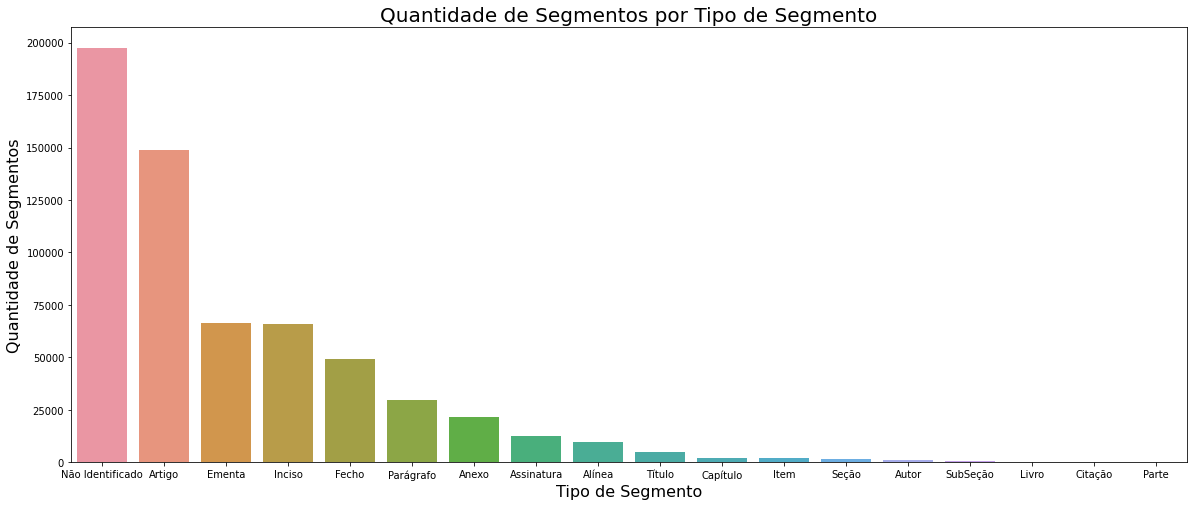

In [62]:
fig = plt.figure(figsize=(20,8))
ax = sns.barplot(x='tipo_segmento', y='qtd_segmentos', data=qtd_segmentos_tipo)
ax.set_title('Quantidade de Segmentos por Tipo de Segmento', fontsize=20)
ax.set_ylabel('Quantidade de Segmentos', fontsize=16)
ax.set_xlabel('Tipo de Segmento', fontsize=16)
plt.show()

### Análise da quantidade de segmentos não identificados por ano

In [86]:
qtd_segmentos_ano = df_segmentos[df_segmentos['tipo_segmento']=='Não Identificado'].groupby(df_segmentos['data_publicacao'].dt.year)['pk_segmento'].count()
df_qtd_segmentos_ano = pd.DataFrame(qtd_segmentos_ano)
df_qtd_segmentos_ano.reset_index(inplace=True)
df_qtd_segmentos_ano.columns = ['ano_publicacao', 'qtd_segmentos']

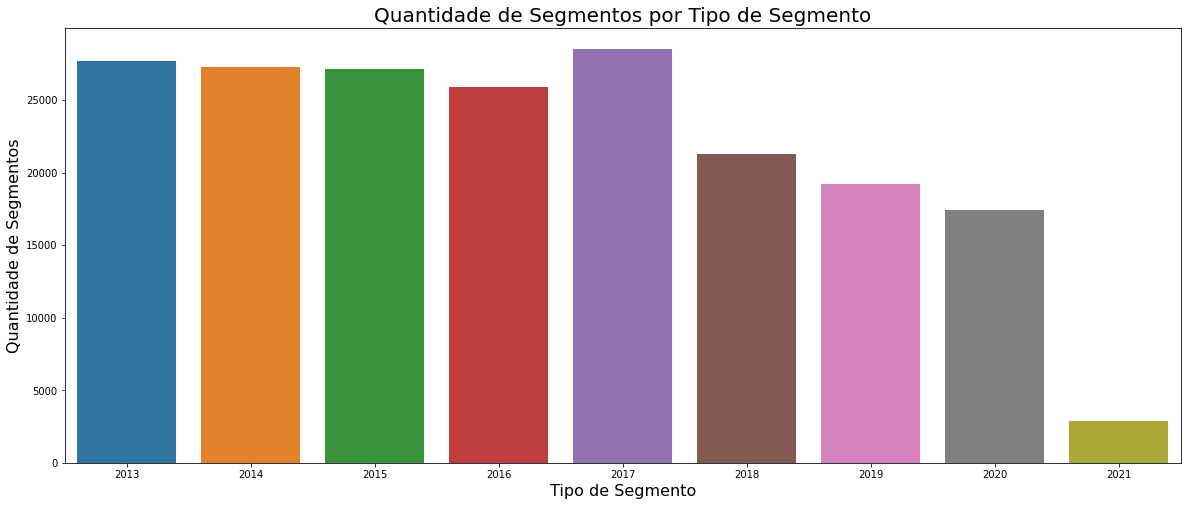

In [87]:
fig = plt.figure(figsize=(20,8))
ax = sns.barplot(x='ano_publicacao', y='qtd_segmentos', data=df_qtd_segmentos_ano)
ax.set_title('Quantidade de Segmentos por Tipo de Segmento', fontsize=20)
ax.set_ylabel('Quantidade de Segmentos', fontsize=16)
ax.set_xlabel('Tipo de Segmento', fontsize=16)
plt.show()